In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import math
from datetime import date

In [2]:
dataset = pd.read_csv('SBAnational.csv', header ='infer', low_memory=False)
print(dataset.shape)

(899164, 27)


In [3]:
dataset.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
print(dataset.describe())

       LoanNr_ChkDgt            Zip          NAICS           Term  \
count   8.991640e+05  899164.000000  899164.000000  899164.000000   
mean    4.772612e+09   53804.391241  398660.950146     110.773078   
std     2.538175e+09   31184.159152  263318.312759      78.857305   
min     1.000014e+09       0.000000       0.000000       0.000000   
25%     2.589758e+09   27587.000000  235210.000000      60.000000   
50%     4.361439e+09   55410.000000  445310.000000      84.000000   
75%     6.904627e+09   83704.000000  561730.000000     120.000000   
max     9.996003e+09   99999.000000  928120.000000     569.000000   

               NoEmp       NewExist      CreateJob    RetainedJob  \
count  899164.000000  899028.000000  899164.000000  899164.000000   
mean       11.411353       1.280404       8.430376      10.797257   
std        74.108196       0.451750     236.688165     237.120600   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.0000

In [5]:
#mirem els valors NAN
dataset.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [6]:
# les variablews identificatives les eliminem
dataset = dataset.drop(axis =1, columns = ['LoanNr_ChkDgt', 'Name', 'ChgOffDate', 'Zip'])

In [7]:
#Al tener mucha cantidad de datos los nans de City y State son insignificantes y los borramos
dataset = dataset.dropna(axis =0, subset=['City','State'])

In [8]:
# Ara tractem la variable objectiu
# prime eliminem els nans ja que no tenen sentit
dataset = dataset.dropna(axis =0, subset=['MIS_Status'])

# passem de tipus object a int (1 = si apriovat, 0 = no aprovat)
loan_status = {'P I F': 1,'CHGOFF': 0}
dataset.MIS_Status = [loan_status[item] for item in dataset.MIS_Status] 

In [9]:
print(Counter(dataset.MIS_Status).keys())
Counter(dataset.MIS_Status).values()

dict_keys([1, 0])


dict_values([739568, 157556])

In [10]:
# HI ha columnes on son de tipus float pero les tracta com a objects, fem el canvi
columnes_float = [17,18,20,21,22]
for i in columnes_float:
    dataset[dataset.columns[i]] = dataset[dataset.columns[i]].replace('[\$,]', '', regex=True).astype(float)

In [11]:
#La seguent es NewExist
#Mirem els possibles valors
Counter(dataset.NewExist).keys()
#Veiem valor 0 que no te sentit

dict_keys([2.0, 1.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [12]:
# per a tractar el valor 0 suposem que si es retenen llocs de treball es que existeix una empresa
cond = dataset[(dataset['NewExist'] == 0) & (dataset['RetainedJob'] >=1)].index
for i in cond:
    dataset.loc[i,['NewExist']] = 1

# igual pero amb els nulls
cond_2 = dataset[(dataset.NewExist.isnull()) & (dataset['RetainedJob'] >=1)].index
for i in cond_2:
    dataset.loc[i,['NewExist']] = 1

In [13]:
print(Counter(dataset.NewExist).keys()) # unique values
print(Counter(dataset.NewExist).values()) # count values

# Arribats aqui eliminem directament els nans i 0, primner passem de 0 a nans
cond_3 = dataset[(dataset['NewExist'] == 0)].index
for i in cond_3:
    dataset.loc[i,['NewExist']] = np.nan #11 corresponds to NewExist column
    
dataset = dataset.dropna(axis =0, subset=['NewExist'])

dict_keys([2.0, 1.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
dict_values([252544, 643687, 874, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [14]:
# Tambe trec el bank i el bankstate ja que son valors unics per lo tant no aporten informacio a la desicio
# les columnes DisbursementDate, DisbursementGross, BalanceGross,ChgOffPrinGr donen info de despres del prestec per tant,
# no son importants
dataset = dataset.drop(axis =1, columns = ['Bank', 'BankState', 'DisbursementDate', 'DisbursementGross', 
                                         'BalanceGross','ChgOffPrinGr'])

In [15]:
dataset.isnull().sum()

City                0
State               0
NAICS               0
ApprovalDate        0
ApprovalFY          0
Term                0
NoEmp               0
NewExist            0
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4517
LowDoc           2578
MIS_Status          0
GrAppv              0
SBA_Appv            0
dtype: int64

In [16]:
# ara passem les dates a date type
dataset['ApprovalDate'] = dataset['ApprovalDate'].astype(str)
dataset['ApprovalDate'] = pd.to_datetime(dataset['ApprovalDate'])

In [17]:
#per a tracta els nans de LowDoc no els eliminarem ja que son un atribuit important per a la prediccio
cond_4 = dataset[(dataset['LowDoc'] != "Y") & (dataset['LowDoc'] != "N")]
cond_4.shape

(5997, 17)

In [18]:
# mirem si existeix algun patro
low_doc = dataset[dataset['LowDoc'] == "Y"]
print("GrAppv: \n", low_doc['GrAppv'].describe())
print("\nTerm: \n", low_doc['Term'].describe())

GrAppv: 
 count     110044.000000
mean       68661.249228
std        37671.560574
min         4000.000000
25%        40000.000000
50%        60000.000000
75%       100000.000000
max      1000000.000000
Name: GrAppv, dtype: float64

Term: 
 count    110044.000000
mean         87.698312
std          45.809355
min           0.000000
25%          60.000000
50%          84.000000
75%          93.000000
max         511.000000
Name: Term, dtype: float64


In [19]:
print(Counter(low_doc.MIS_Status).keys())
print(Counter(low_doc.MIS_Status).values())

dict_keys([1, 0])
dict_values([100151, 9893])


In [20]:
cond_5 = cond_4[(cond_4['GrAppv'] <= 100000) & (cond_4['Term'] <= 93) & (cond_4['MIS_Status'] == 1)]
cond_5.shape
#hi ha 1565 columnes que es poden posar a 1

(1565, 17)

In [21]:
for i in cond_5.index:
    dataset.loc[i,['LowDoc']] = 'Y'

In [22]:
# repetim per al valors false
no_low_doc = dataset[dataset['LowDoc'] == "N"]
print("GrAppv: \n", no_low_doc['GrAppv'].describe())
print("\nTerm: \n", no_low_doc['Term'].describe())
print(Counter(no_low_doc.MIS_Status).keys())
print(Counter(no_low_doc.MIS_Status).values())

GrAppv: 
 count    7.801900e+05
mean     2.104921e+05
std      2.983505e+05
min      1.000000e+03
25%      3.500000e+04
50%      1.000000e+05
75%      2.550000e+05
max      5.472000e+06
Name: GrAppv, dtype: float64

Term: 
 count    780190.000000
mean        114.058374
std          81.945811
min           0.000000
25%          60.000000
50%          84.000000
75%         132.000000
max         569.000000
Name: Term, dtype: float64
dict_keys([1, 0])
dict_values([634164, 146026])


In [23]:
cond_6 = cond_4[(cond_4['GrAppv'] > 100000) & (cond_4['GrAppv'] <= 2.550000e+05) & (cond_4['Term'] > 93) & (cond_4['Term'] <= 132) & (cond_4['MIS_Status'] == 1)]
print(cond_6.shape)

for i in cond_6.index:
    dataset.loc[i,['LowDoc']] = 'N'

(198, 17)


In [24]:
cond_8 = dataset[(dataset['LowDoc'] != "Y") & (dataset['LowDoc'] != "N")]
cond_8.shape
# Aquestes si que les treiem
for i in cond_8.index:
    dataset.loc[i,'LowDoc'] = np.nan

datase4t = dataset.dropna(axis =0, subset=['LowDoc'])

In [25]:
# En el cas de RevLineCr no hi ha ningun patro per a tractar els nans aixi q leliminem
# tambe eliminem les dates de aprovament i la cantitat del gobern ja que es molt similar a la del SBA
dataset = dataset.drop(axis =1, columns = ['ApprovalDate', 'ApprovalFY','RevLineCr','GrAppv'])

In [26]:
# com del NAICS nomes son importants els dos primers nombres eliminem la resta
def dos_primers(d):
    if d <= 0:
        return 0
    return (d // 10 ** (int(math.log(d, 10)) - 1))

dataset['NAICS'] = dataset.NAICS.apply(dos_primers)

In [27]:
def point_def(rate):
    if rate <= 12:
        return 5
    elif  12 < rate <= 17: 
        return 4
    elif 17 < rate <= 21:
        return 3
    elif 21 < rate <= 25:
        return 2
    elif rate > 25:
        return 1
    
def apply_score(i):
    sector_default = {21 : 8, 11 : 9, 55 : 10, 62:10, 22:14, 92:15,54:19, 42:19,31:19,32:16,33:14,81:20,71:21,72:22,44:22,45:23,23:23,56:24,61:24,51:25,48:27,49:23,52:28,53:29}
    if i > 0:
        defrate = None
        if i in sector_default:
            defrate = sector_default[i]
            return point_def(defrate)
    return 0

In [28]:
dataset['Sector_Points'] = dataset.NAICS.apply(apply_score)

In [29]:
def apply_score_state(i):
    state_default = {'MT':8, 'ND': 8, 'WY':8, 'SD':8, 'VT':8, 'ME':10,'NH':10, 'NM':10, 'AK':10, 'WA':13,'AD':13, 'MN':13, 
                     'WI':13, 'IA':13,'NE':13, 'KS':13, 'MA':13,'CT':13,'RI':13,'PA':13, 'NV':23, 'IL':23, 'MI':23, 'KY':23,
                     'GA':23, 'FL':28}
    temp_defrate = None
    average_def_rate = 18
    if i in state_default:
        temp_defrate = state_default[i]
        return point_def(temp_defrate)
    return point_def(average_def_rate)

In [30]:
dataset['State_Points'] = dataset.State.apply(apply_score_state)

In [31]:
dataset = dataset.drop(axis = 1, columns = ['City', 'State', 'NAICS'])

In [32]:
def yes_no(i):
    if i > 0:
        return 1
    return 0

dataset.Term = dataset.Term//12
dataset['IscreateJob'] = dataset.CreateJob.apply(yes_no)
dataset['IsRetained'] = dataset.RetainedJob.apply(yes_no)
dataset['IsFranchise'] = dataset.FranchiseCode.apply(yes_no)

def lowdoc(i):
    if i == "Y":
        return 1
    return 0
dataset.LowDoc = dataset.LowDoc.apply(lowdoc)
dataset = dataset.drop(axis =1, columns = ['FranchiseCode', 'CreateJob', 'RetainedJob'])

In [33]:
dataset.isnull().sum()

Term             0
NoEmp            0
NewExist         0
UrbanRural       0
LowDoc           0
MIS_Status       0
SBA_Appv         0
Sector_Points    0
State_Points     0
IscreateJob      0
IsRetained       0
IsFranchise      0
dtype: int64

In [34]:
dataset.describe()

,Term,NoEmp,NewExist,UrbanRural,LowDoc,MIS_Status,SBA_Appv,Sector_Points,State_Points,IscreateJob,IsRetained,IsFranchise
count,896231.000000,896231.000000,896231.000000,896231.000000,896231.000000,896231.000000,8.962310e+05,896231.000000,896231.000000,896231.000000,896231.000000,896231.000000
mean,9.104249,11.402338,1.281784,0.757413,0.124532,0.824270,1.496817e+05,2.091423,3.128067,0.300669,0.510127,0.767973
std,6.636455,73.628689,0.449869,0.646445,0.330187,0.380591,2.284728e+05,1.448644,0.837907,0.458549,0.499898,0.422127
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000e+02,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2.125000e+04,1.000000,3.000000,0.000000,0.000000,1.000000
50%,7.000000,4.000000,1.000000,1.000000,0.000000,1.000000,6.200000e+04,2.000000,3.000000,0.000000,1.000000,1.000000
75%,10.000000,10.000000,2.000000,1.000000,0.000000,1.000000,1.750000e+05,3.000000,4.000000,1.000000,1.000000,1.000000
max,47.000000,9999.000000,2.000000,2.000000,1.000000,1.000000,5.472000e+06,5.000000,5.000000,1.000000,1.000000,1.000000


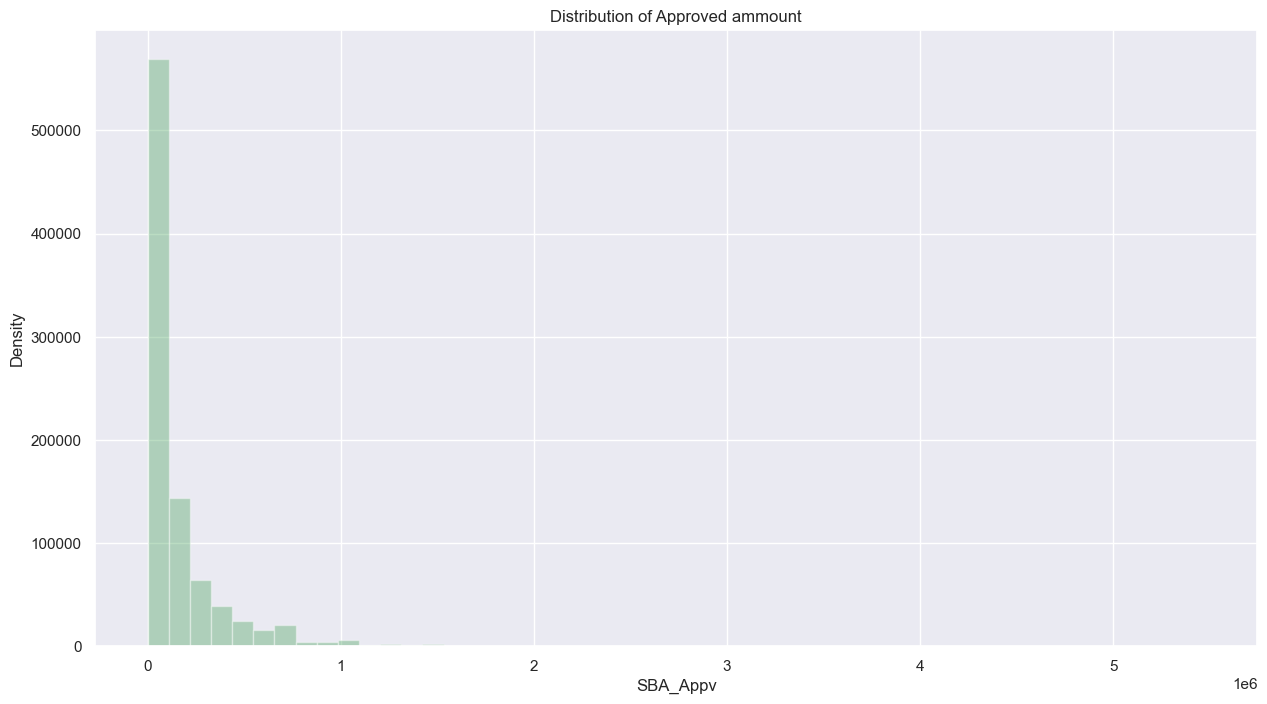

In [42]:
plt.figure(figsize=(15, 8))
sns.distplot(dataset['SBA_Appv'], color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

In [45]:
dataset['SBA_Appv'] = np.log(dataset['SBA_Appv']) 

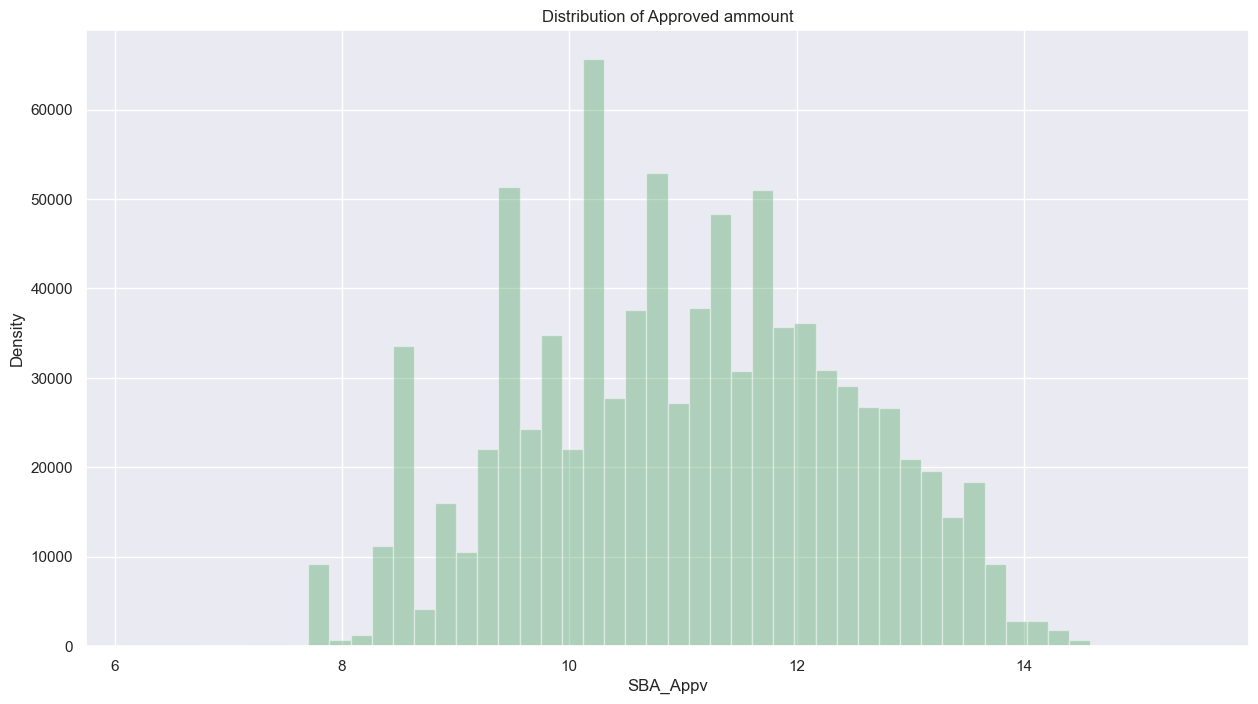

In [46]:
plt.figure(figsize=(15, 8))
sns.distplot(dataset['SBA_Appv'], color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

<Figure size 5800x100 with 0 Axes>

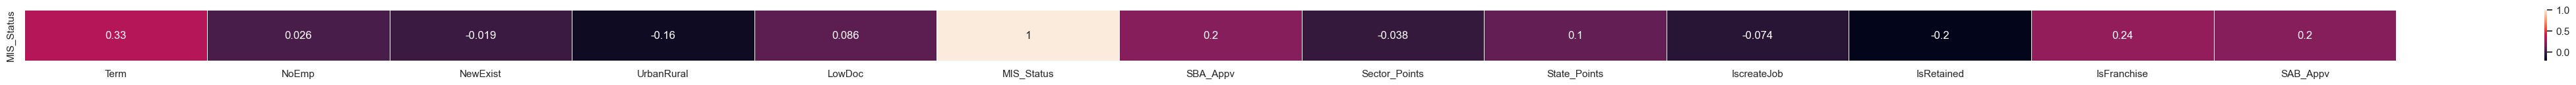

In [47]:
loan_correlation = dataset.corr()['MIS_Status'].to_frame().T 
plt.figure(figsize=(58,1))
plt.subplots(figsize=(58, 1))
sns.heatmap(loan_correlation, linewidths=0.5, annot=True)
plt.show()